In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\jayas\Downloads\Hotel_Reviews.csv")

In [3]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [4]:
df["Review"] = df["Positive_Review"] + df["Negative_Review"]

In [5]:
df["Is_bad_review"] = df["Reviewer_Score"].apply(lambda x : 1 if x > 5 else 0)

In [6]:
df = df[["Review","Is_bad_review"]]

In [7]:
df.head()

,Review,Is_bad_review
0,Only the park outside of the hotel was beauti...,0
1,No real complaints the hotel was great great ...,1
2,Location was good and staff were ok It is cut...,1
3,Great location in nice surroundings the bar a...,0
4,Amazing location and building Romantic settin...,1


In [8]:
df = df.sample(frac=0.1,random_state=0,replace=False)

In [9]:
df

,Review,Is_bad_review
276954,No Positive Very expensive Staff attitude was ...,0
231304,Excellent location close to tube station Roya...,1
247559,The rooms are very quiet The breakfast was go...,1
432314,Loved the roof top pool and bar area everythi...,1
453374,The proximity to the railway station right ac...,1
...,...,...
237933,Close to the tube and fantastic room breakfas...,1
401290,Good breakfast choice very good breakfast and...,1
402865,Amenities and great shower Very confortable b...,1
52949,No Positive Bad restaurant and non professiona...,0


In [10]:
df["Review"] = df["Review"].apply(lambda x: x.replace("No Negative","").replace("No Positive",""))

In [11]:
from nltk.corpus import wordnet

In [12]:
def get_word_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [13]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import WhitespaceTokenizer

In [14]:
def clean_text(text):
    text = text.lower()
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    text = [word for word in text if not any(c.isdigit() for c in word)]
    stopwords1 = stopwords.words("english")
    text = [x for x in text if x not in stopwords1]
    text = [t for t in text if len(t) > 0]
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_word_pos(t[1])) for t in pos_tags]
    text = [t for t in text if len(t) > 1]
    text = " ".join(text)
    return text
df['clean_reviews'] = df["Review"].apply(lambda x: clean_text(x))

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()
df["Sentiments"] = df["Review"].apply(lambda x : sent.polarity_scores(x))
df = pd.concat([df.drop(["Sentiments"],axis = 1),df["Sentiments"].apply(pd.Series)],axis = 1)

In [16]:
df.head()

,Review,Is_bad_review,clean_reviews,neg,neu,pos,compound
276954,Very expensive Staff attitude was lacking,0,expensive staff attitude lacking,0.000,1.000,0.000,0.0000
231304,Excellent location close to tube station Roya...,1,excellent location close tube station royal al...,0.000,0.591,0.409,0.8402
247559,The rooms are very quiet The breakfast was go...,1,room quiet breakfast good location excellent c...,0.000,0.632,0.368,0.9179
432314,Loved the roof top pool and bar area everythi...,1,love roof top pool bar area everything beautif...,0.085,0.675,0.240,0.7351
453374,The proximity to the railway station right ac...,1,proximity railway station right across street ...,0.039,0.679,0.282,0.9228


In [17]:
df["nb_chars"] = df["Review"].apply(lambda x : len(x))
df["nb_words"] = df["Review"].apply(lambda x: len(x.split(" ")))

In [18]:
df.head()

,Review,Is_bad_review,clean_reviews,neg,neu,pos,compound,nb_chars,nb_words
276954,Very expensive Staff attitude was lacking,0,expensive staff attitude lacking,0.000,1.000,0.000,0.0000,43,8
231304,Excellent location close to tube station Roya...,1,excellent location close tube station royal al...,0.000,0.591,0.409,0.8402,96,17
247559,The rooms are very quiet The breakfast was go...,1,room quiet breakfast good location excellent c...,0.000,0.632,0.368,0.9179,160,32
432314,Loved the roof top pool and bar area everythi...,1,love roof top pool bar area everything beautif...,0.085,0.675,0.240,0.7351,173,34
453374,The proximity to the railway station right ac...,1,proximity railway station right across street ...,0.039,0.679,0.282,0.9228,290,51


In [19]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install --upgrade numpy gensim



  Using cached numpy-2.1.2-cp312-cp312-win_amd64.whl.metadata (59 kB)


In [21]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec,TaggedDocument

In [22]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["Review"].apply(lambda x : x.split(" ")))]
model = Doc2Vec(documents,vector_size=5,window=2,min_count = 1,workers = 4)
doc2_vex_df = df["clean_reviews"].apply(lambda x : model.infer_vector(x.split(" "))).apply(pd.Series)
doc2_vex_df.columns = ["doc2vec_vector" + str(x) for x in doc2_vex_df.columns]
df = pd.concat([df,doc2_vex_df],axis = 1)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_res = tfidf.fit_transform(df["clean_reviews"]).toarray()
tfidf_df = pd.DataFrame(tfidf_res,columns=tfidf.get_feature_names_out())
tfidf_col = ["word" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
df = pd.concat([df,tfidf_df],axis= 1)

In [24]:
df

,Review,Is_bad_review,clean_reviews,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector0,...,yo,yoghurt,yogurt,young,yr,yummy,zero,zone,zoo,zuid
276954,Very expensive Staff attitude was lacking,0,expensive staff attitude lacking,0.000,1.000,0.000,0.0000,43,8,0.097594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231304,Excellent location close to tube station Roya...,1,excellent location close tube station royal al...,0.000,0.591,0.409,0.8402,96,17,0.151111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247559,The rooms are very quiet The breakfast was go...,1,room quiet breakfast good location excellent c...,0.000,0.632,0.368,0.9179,160,32,-0.090625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
432314,Loved the roof top pool and bar area everythi...,1,love roof top pool bar area everything beautif...,0.085,0.675,0.240,0.7351,173,34,-0.130165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
453374,The proximity to the railway station right ac...,1,proximity railway station right across street ...,0.039,0.679,0.282,0.9228,290,51,0.247837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237933,Close to the tube and fantastic room breakfas...,1,close tube fantastic room breakfast service,0.000,0.714,0.286,0.5574,59,11,0.033900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
401290,Good breakfast choice very good breakfast and...,1,good breakfast choice good breakfast reception...,0.082,0.653,0.265,0.7645,198,35,-0.068689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
402865,Amenities and great shower Very confortable b...,1,amenity great shower confortable bed nothing,0.000,0.631,0.369,0.6249,56,9,0.028104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52949,Bad restaurant and non professional staff,0,bad restaurant non professional staff,0.412,0.588,0.000,-0.5423,42,7,0.039399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df.shape

(51574, 3865)

In [26]:
df["Is_bad_review"].value_counts(normalize = True)

Is_bad_review
1    0.941405
0    0.058595
Name: proportion, dtype: float64

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

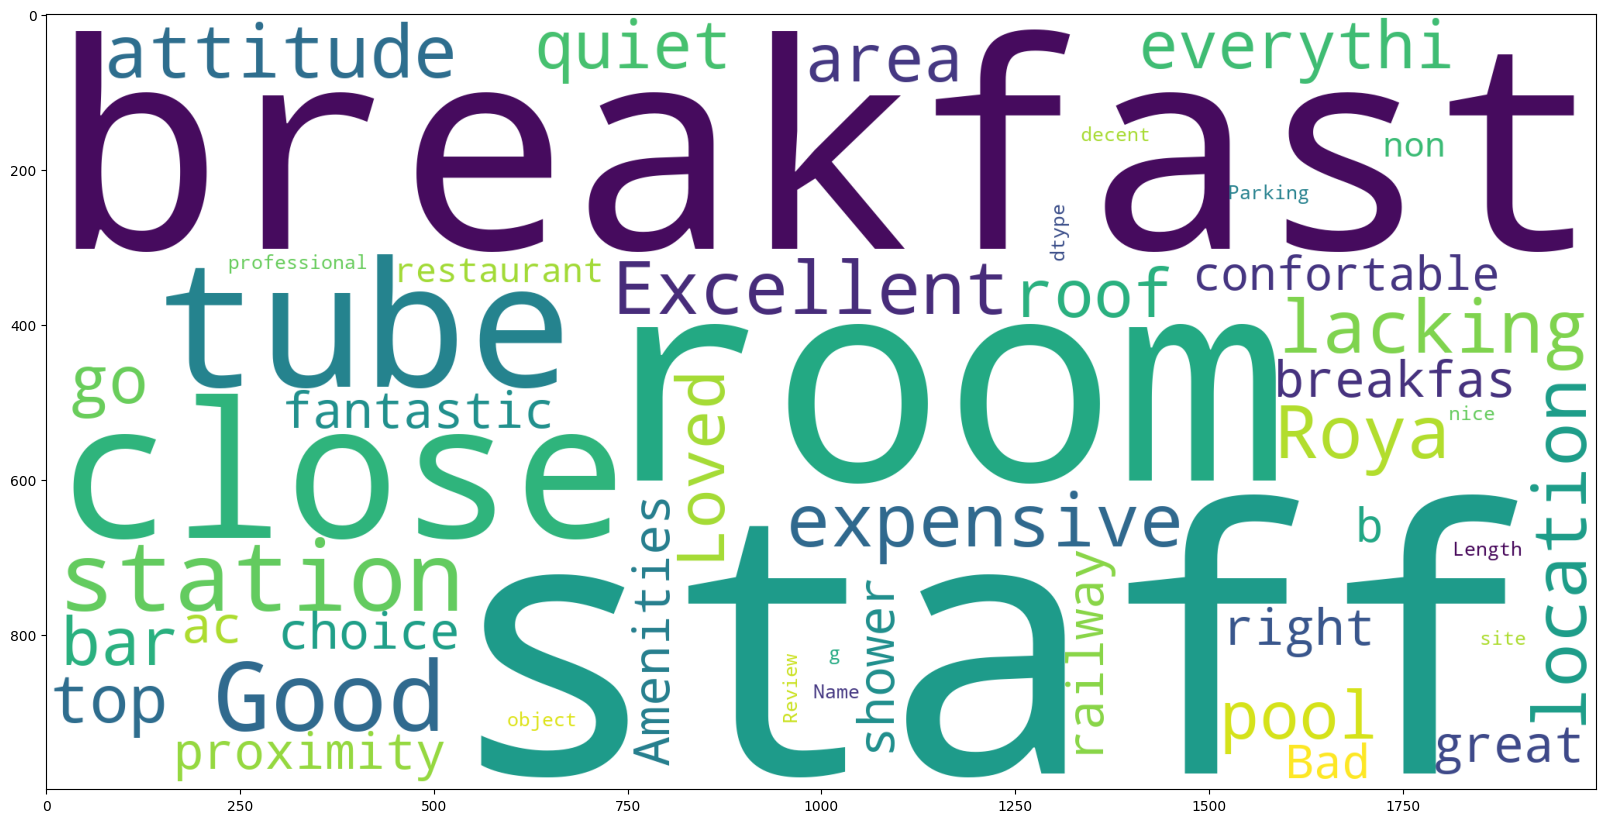

In [28]:
wordcloud = WordCloud(max_words = 200,scale = 5,random_state = 42,background_color = 'white').generate(str(df["Review"]))
plt.figure(1,figsize = (20,20))
plt.imshow(wordcloud)

In [29]:
df[df["nb_words"] >= 5].sort_values("pos",ascending = False)[["Review","pos"]].head(10)

,Review,pos
335492,Nice clean comfortable,1.000
180510,A super friendly welcome,1.000
50106,Friendly helpful staff Clean super comfortable,0.941
390405,Comfortable clean great location Definitely r...,0.939
408903,Great location Great value,0.914
125867,Great location excellent value,0.911
173854,Excellent location clean comfortable,0.907
204398,Clean comfortable and CLASSY,0.906
140259,Quiet friendly easy relaxing,0.903
291323,Good location Comfortable Clean,0.899


In [30]:
import seaborn as sns

C:\Users\jayas\AppData\Local\Temp\ipykernel_14156\3026921928.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['compound'],hist = False,label = label)
C:\Users\jayas\AppData\Local\Temp\ipykernel_14156\3026921928.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subse

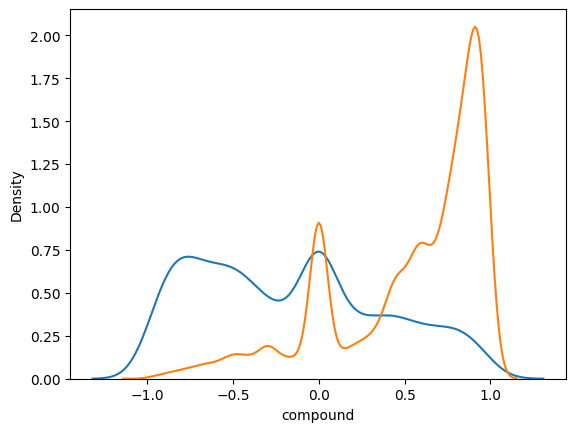

In [31]:
for x in [0,1]:
    subset = df[df["Is_bad_review"] == x]
    if x == 0:
        label = "Good Reviews"
    else:
        label = "Bad Reviews"
    sns.distplot(subset['compound'],hist = False,label = label)

In [32]:
ignore_cols = ["Is_bad_review","Review","clean_reviews"]
features = [c for c in df.columns if c not in ignore_cols]

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[features],df["Is_bad_review"],test_size=0.20,random_state= 0)

In [34]:
rf = RandomForestClassifier(n_estimators= 100,random_state=0)
rf.fit(x_train,y_train)
feature_df = pd.DataFrame({"features" : features,"importance" : rf.feature_importances_}).sort_values("importance",ascending=False)


In [35]:
feature_df.head()

,features,importance
3,compound,0.044401
2,pos,0.027145
0,neg,0.024568
8,doc2vec_vector2,0.021998
9,doc2vec_vector3,0.018953


In [36]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

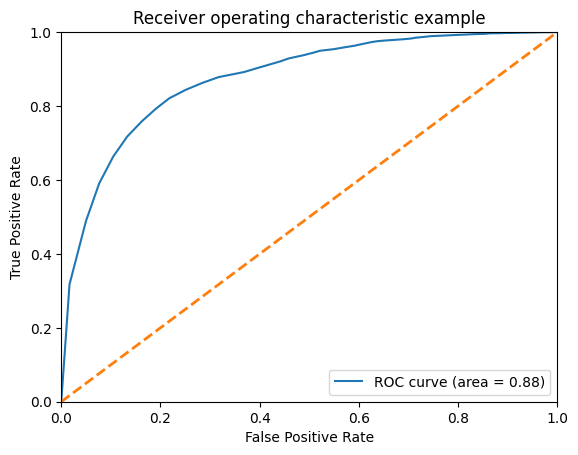

In [39]:
y_pred = [x[1] for x in rf.predict_proba(x_test)]
fpr,tpr,thresolds = roc_curve(y_test,y_pred,pos_label=1)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()